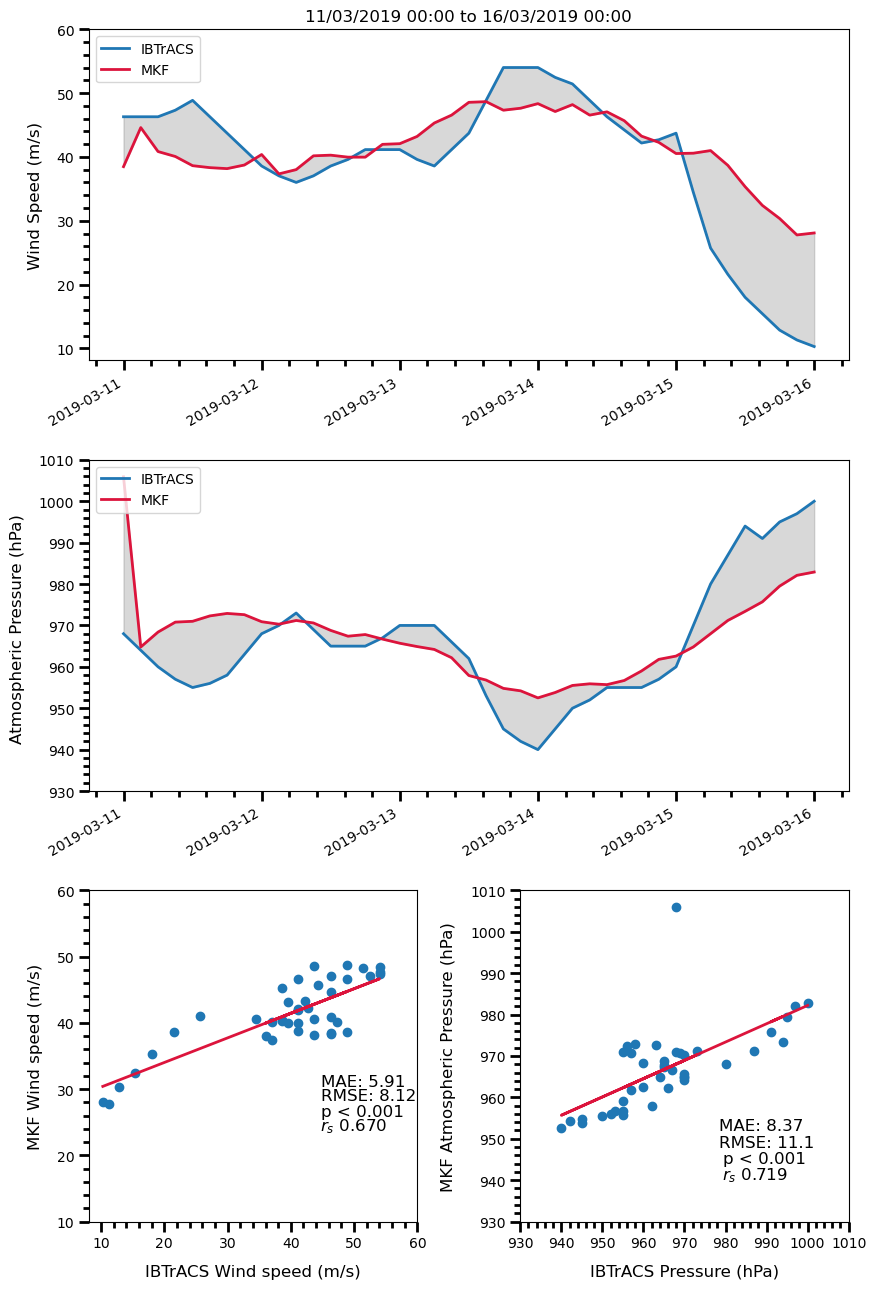

In [1]:
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Reu_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MKF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_KF','Pressure_KF'])
wind_kf = csv_import['Wind_KF']*0.51444 #Knots to m/s
wind_kf = wind_kf.values
#print(wind_kf)
pres_kf = csv_import['Pressure_KF']
pres_kf = pres_kf.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_kf, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_kf, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_kf)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_kf)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_kf, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_kf, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_kf)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_kf)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)


#4. Create variable to store X-Axis data.
# Rearrange time.
#idx   = pd.date_range('2020-04-12 12:00', '2020-04-19 18:45', freq = '1H')
idx   = pd.date_range('2019-03-11 00:00', '2019-03-16 00:00', freq = '3H')
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%d/%M %Hh')

#3. Plot figure and set axis/data resources.
# Create figures subplots.
#axs = plt.subplots(4, 1, constrained_layout=True)
fig = plt.figure()

# Y-axis range for each plots.
y_major_ticks  = np.arange(10, 60.1, 10)
y_major_ticks2 = np.arange(930, 1010.1, 10)
y_major_ticks3 = np.arange(0, 1, 2)
y_major_ticks4 = np.arange(-4, 5, 0.5)

# Plot the figures.
# Plot 1.
ax1 = plt.subplot2grid((3,3), (0,0),rowspan=1,colspan=2)
ax1.plot(idx,wind_ib,linestyle='-',label='IBTrACS', marker='',linewidth=2,color='C0')  
ax1.plot(idx,wind_kf,linestyle='-',label='MKF',marker='',linewidth=2,color='crimson') 
plt.fill_between(idx, wind_ib, wind_kf,alpha=0.3,color='gray')
ax1.legend(loc='upper left',fontsize=10)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both',  width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.set_yticks(y_major_ticks)
ax1.set_ylabel('Wind Speed (m/s)',fontsize=12, labelpad=10) #Temperature \n [°C]
ax1.set_title('11/03/2019 00:00 to 16/03/2019 00:00')
for label in ax1.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 2.
ax2 = plt.subplot2grid((3,3), (1,0), rowspan=1,colspan=2) 
ax2.plot(idx,pres_ib,label='IBTrACS',linestyle='-',marker='',linewidth=2,color='C0',alpha=1)    
ax2.plot(idx,pres_kf,label='MKF',linestyle='-',marker='',linewidth=2,color='crimson')
plt.fill_between(idx, pres_ib, pres_kf,alpha=0.3,color='gray')
ax2.legend(loc='upper left',fontsize=10)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both',  width=2)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax2.set_yticks(y_major_ticks2)
ax2.set_ylabel('Atmospheric Pressure (hPa) ',fontsize=12, labelpad=10) #\n [hPa]
for label in ax2.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 3.
ax3 = plt.subplot2grid((3,3), (2,0)) 
ax3.scatter(wind_ib,wind_kf,color='C0')   
ax3.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='both',  width=2)
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
ax3.set_yticks(y_major_ticks)
ax3.set_xticks(y_major_ticks)
ax3.set_ylabel('MKF Wind speed (m/s)',fontsize=12, labelpad=10)
ax3.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=10)
ax3.text(44.6,23.8,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax3.text(44.8,26.0,'p < 0.001',color='k',fontsize=12)
else:
    ax3.text(44.8,26.0,'p > 0.001',color='k',fontsize=12)  
ax3.text(44.8,30.4,'MAE: '+mae1,color='k',fontsize=12)
ax3.text(44.8,28.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 4.
ax4 = plt.subplot2grid((3,3), (2,1),)     
ax4.scatter(pres_ib,pres_kf,color='C0')  
ax4.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which='both',  width=2)
ax4.tick_params(which='major', length=7)
ax4.tick_params(which='minor', length=4)
ax4.set_yticks(y_major_ticks2)
ax4.set_xticks(y_major_ticks2)
ax4.set_ylabel('MKF Atmospheric Pressure (hPa)',fontsize=12, labelpad=10)
ax4.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=10)
ax4.text(979.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax4.text(979.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax4.text(979.5,944.2,'p > 0.001',color='k',fontsize=12)
ax4.text(978.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax4.text(978.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)


# Set final fig resources and then save figure.
fig.set_size_inches(13, 13)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
fig.savefig('feb_mkfreu_linear_reg_time_series.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)


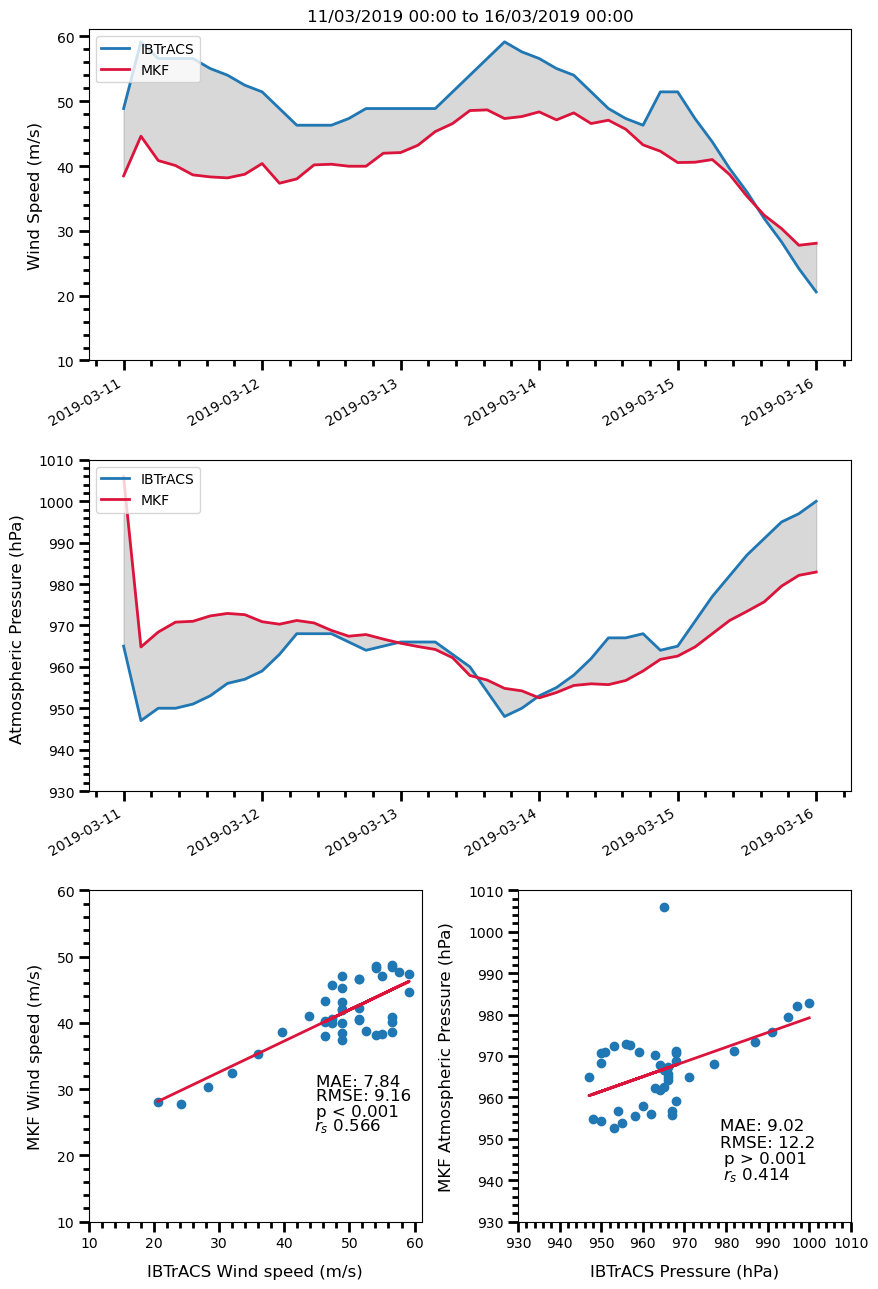

In [2]:
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
from sklearn.metrics import mean_absolute_error
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
'''
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })
'''
#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
#"D:\2023\Track\rmse_example_airport\homemade_weather_station.csv"
#csv_import = pd.read_csv('/mnt/d/2023/Track/rmse_example_airport/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
# header=None, names=['Temp_WS','Pressure_WS'])

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_Wmo_wnd_pressure_Idai.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Wind_IB','Pressure_IB'])


wind_ib = csv_import['Wind_IB']*0.51444 #Knots to m/s
wind_ib = wind_ib.values
#print(wind_ib)
pres_ib = csv_import['Pressure_IB']
pres_ws = pres_ib.values

csv_import = pd.read_csv('/mnt/d/2023/Track/11_16_Rmse_p_value/11_16_3hr_MKF_wnd_pressure_Idai.csv',keep_default_na=True, delimiter=','
, header=None,names=['Wind_KF','Pressure_KF'])
wind_kf = csv_import['Wind_KF']*0.51444 #Knots to m/s
wind_kf = wind_kf.values
#print(wind_kf)
pres_kf = csv_import['Pressure_KF']
pres_kf = pres_kf.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(wind_ib,wind_kf, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(wind_ib,wind_kf, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((wind_ib-wind_kf)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]
mae1=mean_absolute_error(wind_ib,wind_kf)
mae1 = str(mae1)
mae1 = mae1[0:4]
#print('mae1=',mae1)

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ib,pres_kf, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ib,pres_kf, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ib-pres_kf)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]
mae2=mean_absolute_error(pres_ib,pres_kf)
mae2 = str(mae2)
mae2 = mae2[0:4]
#print('mae2=',mae2)


#4. Create variable to store X-Axis data.
# Rearrange time.
#idx   = pd.date_range('2020-04-12 12:00', '2020-04-19 18:45', freq = '1H')
idx   = pd.date_range('2019-03-11 00:00', '2019-03-16 00:00', freq = '3H')
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%d/%M %Hh')

#3. Plot figure and set axis/data resources.
# Create figures subplots.
#axs = plt.subplots(4, 1, constrained_layout=True)
fig = plt.figure()

# Y-axis range for each plots.
y_major_ticks  = np.arange(10, 60.1, 10)
y_major_ticks2 = np.arange(930, 1010.1, 10)
y_major_ticks3 = np.arange(0, 1, 2)
y_major_ticks4 = np.arange(-4, 5, 0.5)

# Plot the figures.
# Plot 1.
ax1 = plt.subplot2grid((3,3), (0,0),rowspan=1,colspan=2)
ax1.plot(idx,wind_ib,linestyle='-',label='IBTrACS', marker='',linewidth=2,color='C0')  
ax1.plot(idx,wind_kf,linestyle='-',label='MKF',marker='',linewidth=2,color='crimson') 
plt.fill_between(idx, wind_ib, wind_kf,alpha=0.3,color='gray')
ax1.legend(loc='upper left',fontsize=10)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both',  width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.set_yticks(y_major_ticks)
ax1.set_ylabel('Wind Speed (m/s)',fontsize=12, labelpad=10) #Temperature \n [°C]
ax1.set_title('11/03/2019 00:00 to 16/03/2019 00:00')
for label in ax1.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 2.
ax2 = plt.subplot2grid((3,3), (1,0), rowspan=1,colspan=2) 
ax2.plot(idx,pres_ib,label='IBTrACS',linestyle='-',marker='',linewidth=2,color='C0',alpha=1)    
ax2.plot(idx,pres_kf,label='MKF',linestyle='-',marker='',linewidth=2,color='crimson')
plt.fill_between(idx, pres_ib, pres_kf,alpha=0.3,color='gray')
ax2.legend(loc='upper left',fontsize=10)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both',  width=2)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax2.set_yticks(y_major_ticks2)
ax2.set_ylabel('Atmospheric Pressure (hPa) ',fontsize=12, labelpad=10) #\n [hPa]
for label in ax2.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 3.
ax3 = plt.subplot2grid((3,3), (2,0)) 
ax3.scatter(wind_ib,wind_kf,color='C0')   
ax3.plot(wind_ib,p1(wind_ib),linestyle='-',color='crimson',linewidth=2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='both',  width=2)
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
ax3.set_yticks(y_major_ticks)
ax3.set_xticks(y_major_ticks)
ax3.set_ylabel('MKF Wind speed (m/s)',fontsize=12, labelpad=10)
ax3.set_xlabel('IBTrACS Wind speed (m/s)',fontsize=12, labelpad=10)
ax3.text(44.6,23.8,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax3.text(44.8,26.0,'p < 0.001',color='k',fontsize=12)
else:
    ax3.text(44.8,26.0,'p > 0.001',color='k',fontsize=12)  
ax3.text(44.8,30.4,'MAE: '+mae1,color='k',fontsize=12)
ax3.text(44.8,28.4,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 4.
ax4 = plt.subplot2grid((3,3), (2,1),)     
ax4.scatter(pres_ib,pres_kf,color='C0')  
ax4.plot(pres_ib,p2(pres_ib),linestyle='-',color='crimson',linewidth=2)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which='both',  width=2)
ax4.tick_params(which='major', length=7)
ax4.tick_params(which='minor', length=4)
ax4.set_yticks(y_major_ticks2)
ax4.set_xticks(y_major_ticks2)
ax4.set_ylabel('MKF Atmospheric Pressure (hPa)',fontsize=12, labelpad=10)
ax4.set_xlabel('IBTrACS Pressure (hPa)',fontsize=12, labelpad=10)
ax4.text(979.2,940.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax4.text(979.5,944.2,'p < 0.001',color='k',fontsize=12)
else:
    ax4.text(979.5,944.2,'p > 0.001',color='k',fontsize=12)
ax4.text(978.5,952.2,'MAE: '+mae2,color='k',fontsize=12)
ax4.text(978.5,948.0,'RMSE: '+rmse2,color='k',fontsize=12)


# Set final fig resources and then save figure.
fig.set_size_inches(13, 13)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
fig.savefig('feb_mkfwmo_linear_reg_time_series.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)
